In [1]:
# system
import os, sys, glob, re, itertools, collections, requests
import multiprocessing # parallelise list comprehensions
from pathlib import Path

# pyscience imports
import numpy as np
import pandas as pd

# viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
font = {'family' : 'IBM Plex Sans',
               'weight' : 'normal',
               'size'   : 10}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (10, 10)
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# geodata packages
import geopandas as gpd
import fiona
# raster packages
# import rasterio as rio
# from rasterstats import zonal_stats

# show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
root = Path("/home/alal/Dropbox/_Data/misc_spatial/admin_boundaries/")


# Country Codes

In [3]:
countryweb =  "https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv"
country_csv = pd.read_csv(countryweb)
country_csv.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [4]:
country_csv.to_csv(root/"country_codes/country_codes.csv")

In [5]:
afr_codes = country_csv.query("Continent_Code == 'AF'")
asi_codes = country_csv.query("Continent_Code == 'AS'")
eur_codes = country_csv.query("Continent_Code == 'EU'")

In [6]:
afr_codes.to_csv(root/'country_codes/afr_codes.csv')
asi_codes.to_csv(root/'country_codes/asia_codes.csv')
eur_codes.to_csv(root/'country_codes/eur_codes.csv')

## Ingest GADM Layers and write to Parquet

In [7]:
gadm_path = root/'raw/gadm36_levels_shp.zip'

## L1

In [8]:
%%time
zippath = f"zip://{gadm_path}!gadm36_1.shp"
zippath
l1 = gpd.read_file(zippath)

CPU times: user 19.1 s, sys: 847 ms, total: 19.9 s
Wall time: 19.9 s


<AxesSubplot:>

Text(0.5, 1.0, 'GADM Level 1')

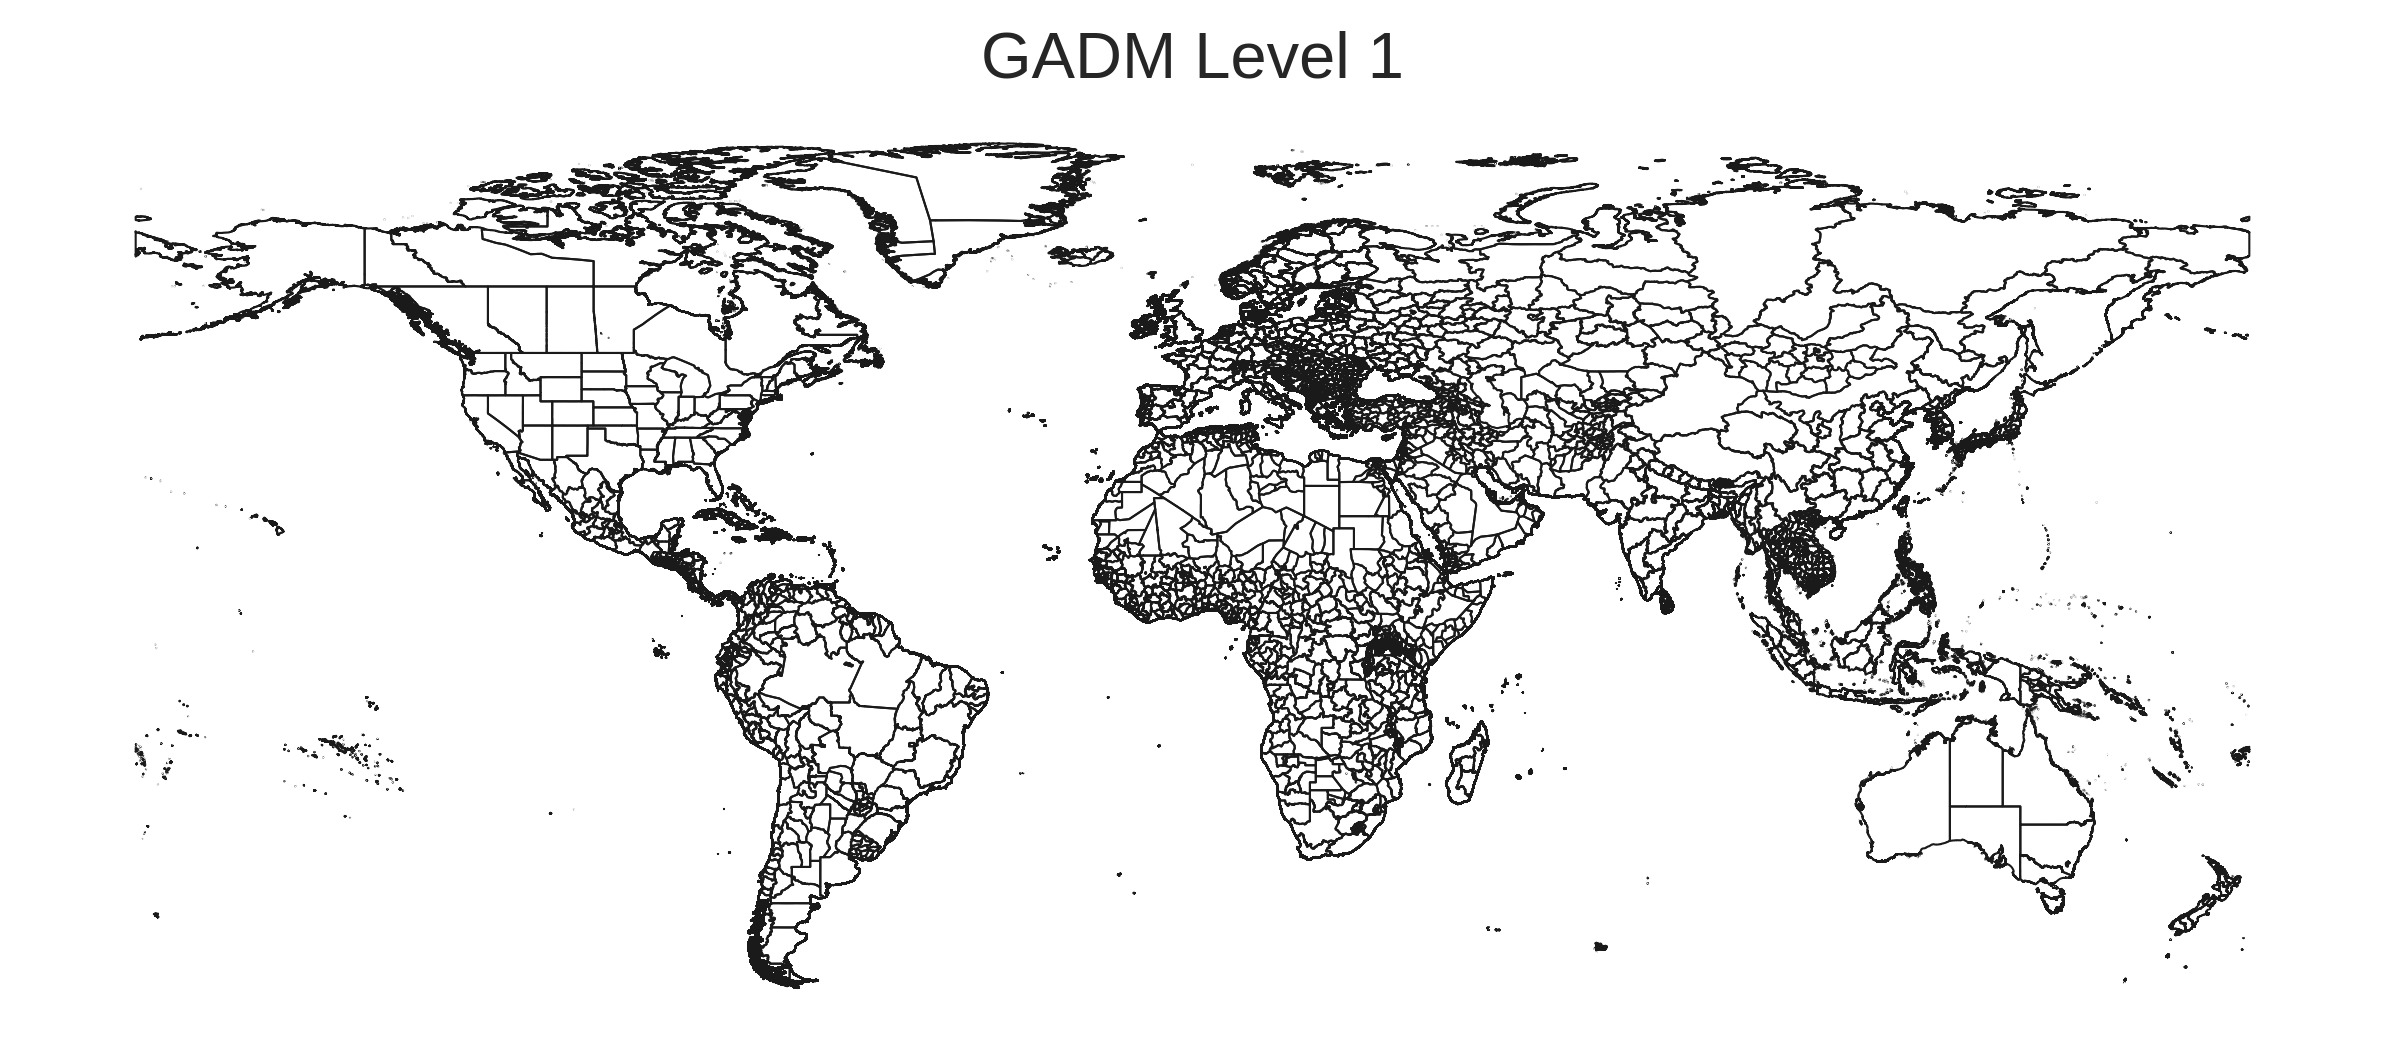

In [9]:
f, ax = plt.subplots(figsize = (10, 12), dpi = 150)
l1.boundary.plot(facecolor = 'None', edgecolor = 'k', linewidth = 0.5, ax = ax)
ax.set_title("GADM Level 1")
ax.set_axis_off()

In [10]:
l1.to_parquet(root/'parquet/gadm_l1.spq')

/home/alal/anaconda3/envs/gds/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


### L2

In [11]:
%%time
zippath = f"zip://{gadm_path}!gadm36_2.shp"
zippath
l2 = gpd.read_file(zippath)

CPU times: user 31.4 s, sys: 704 ms, total: 32.1 s
Wall time: 32 s


<AxesSubplot:>

Text(0.5, 1.0, 'GADM Level 2')

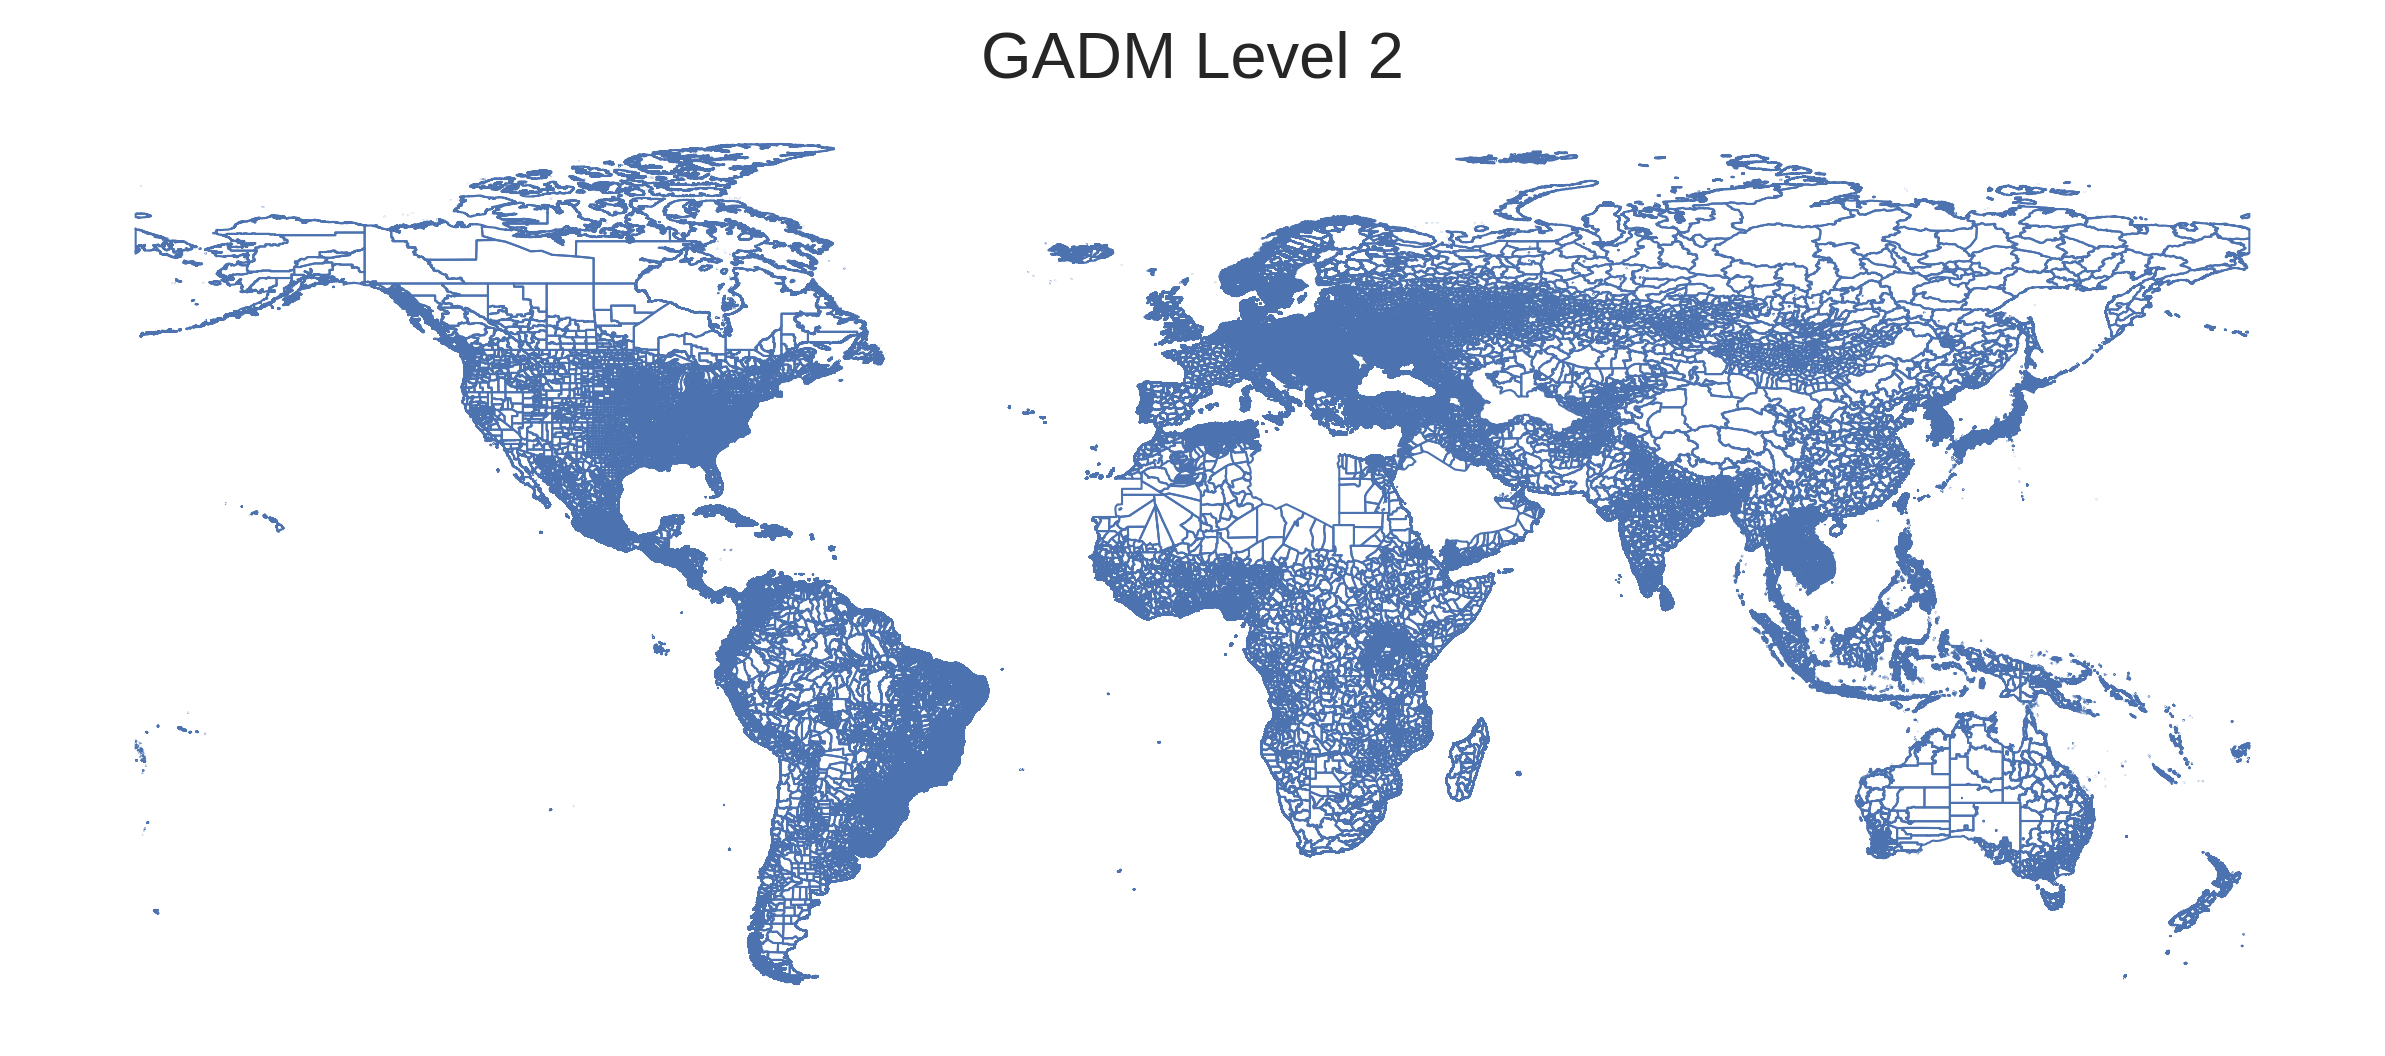

In [12]:
f, ax = plt.subplots(figsize = (10, 12), dpi = 150)
l2.boundary.plot(facecolor = 'None', edgecolor = 'b', linewidth = 0.5, ax = ax)
ax.set_title("GADM Level 2")
ax.set_axis_off()

missing for Saudi Arabia, Libya

In [13]:
%%time
l2.to_parquet(root/'parquet/gadm_l2.spq')

/home/alal/anaconda3/envs/gds/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


CPU times: user 11.8 s, sys: 1.53 s, total: 13.3 s
Wall time: 13.2 s


##  L3

In [14]:
%%time
zippath = f"zip://{gadm_path}!gadm36_3.shp"
l3 = gpd.read_file(zippath)

CPU times: user 39.7 s, sys: 716 ms, total: 40.4 s
Wall time: 40.4 s


<AxesSubplot:>

Text(0.5, 1.0, 'GADM Level 3')

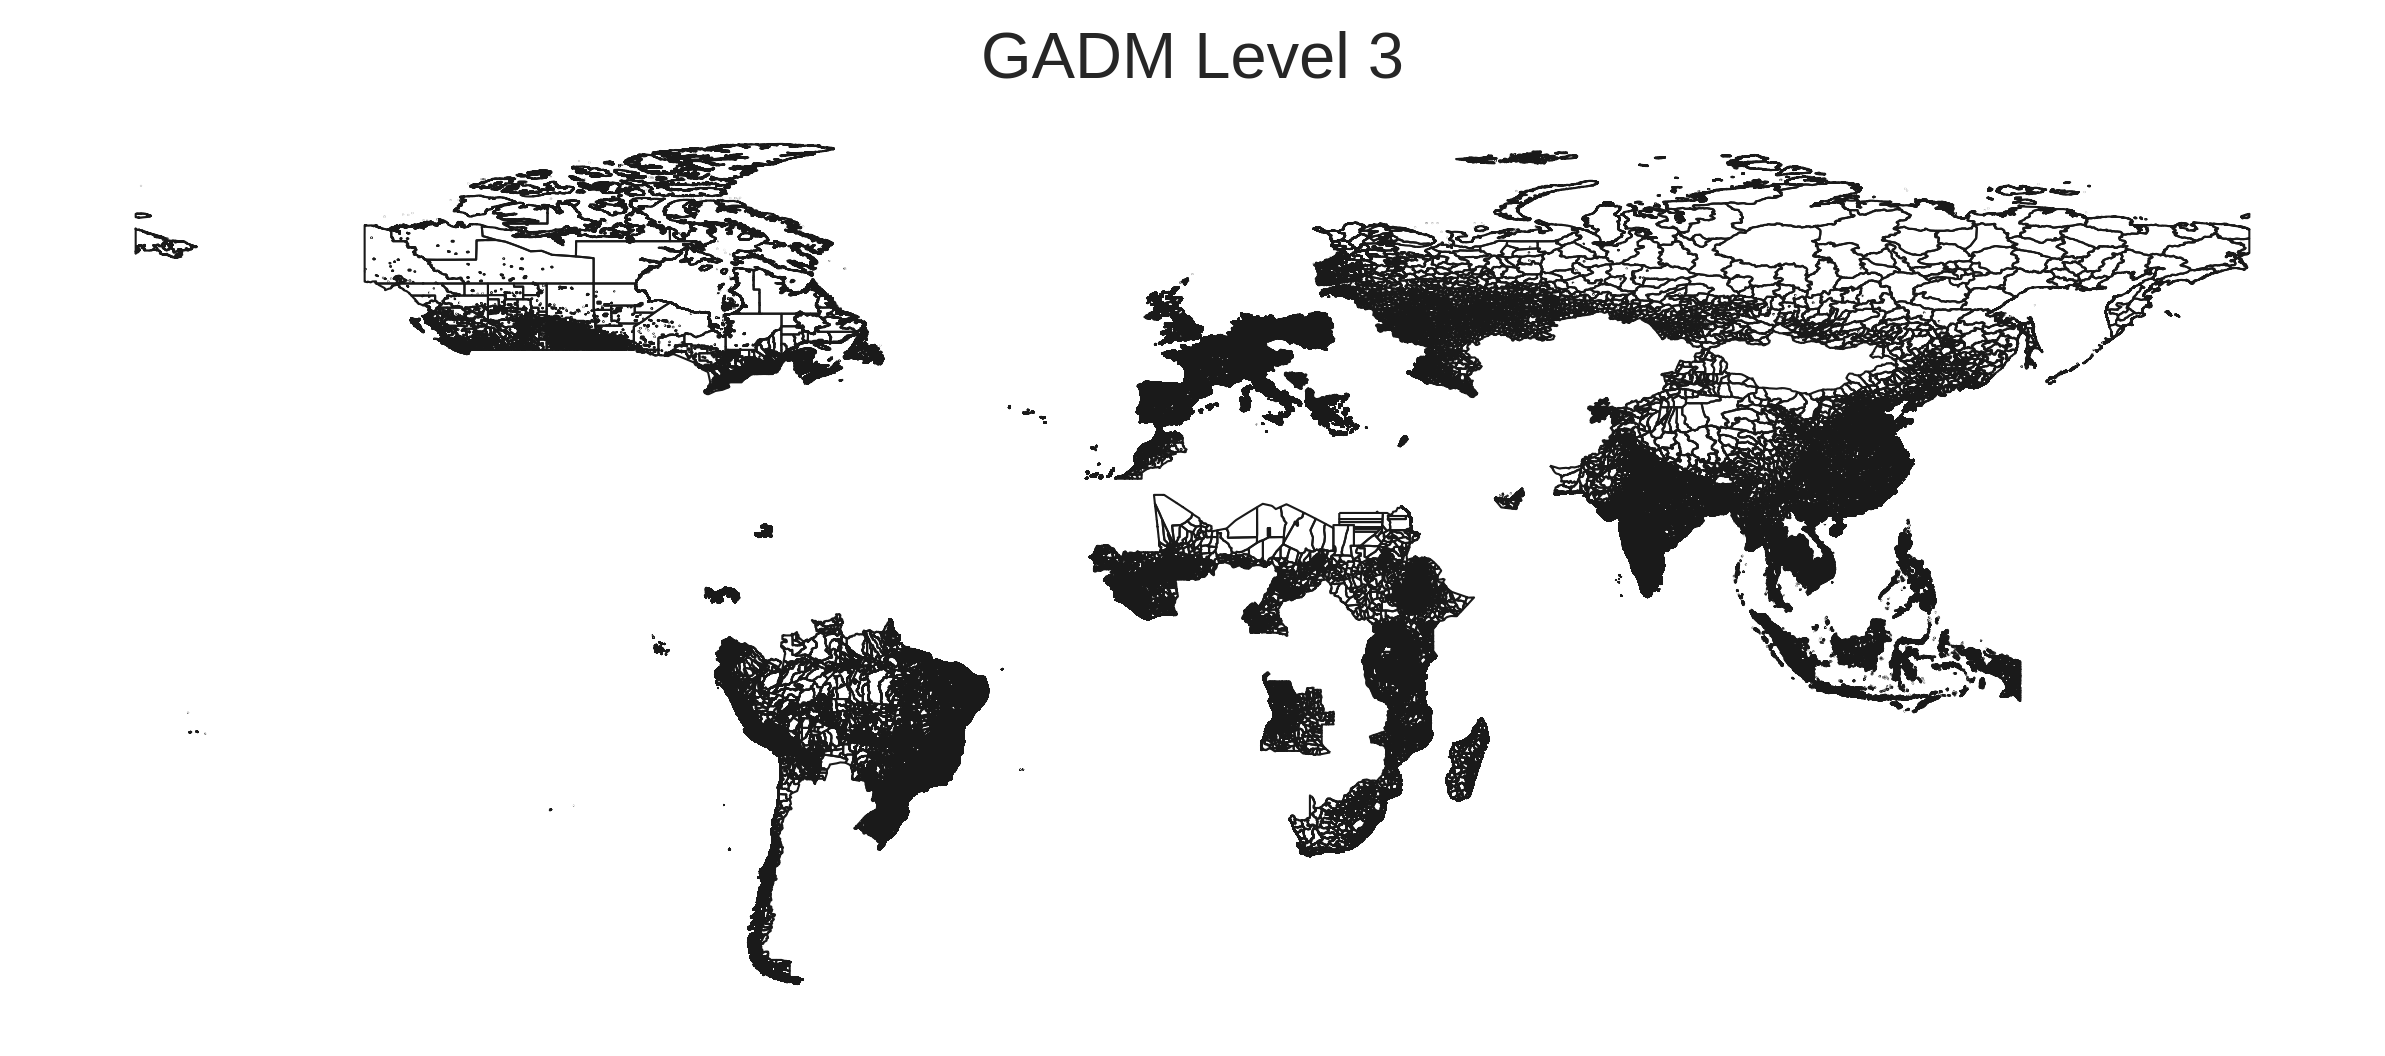

In [15]:
f, ax = plt.subplots(figsize = (10, 12), dpi = 150)
l3.boundary.plot(facecolor = 'None', edgecolor = 'k', linewidth = 0.5, ax = ax)
ax.set_title("GADM Level 3")
ax.set_axis_off()

missing for lots of Africa.

## Continents

In [16]:
afr_codes.head()
l2.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
6,Africa,AF,"Angola, Republic of",AO,AGO,24.0
24,Africa,AF,"Botswana, Republic of",BW,BWA,72.0
34,Africa,AF,"Burundi, Republic of",BI,BDI,108.0
37,Africa,AF,"Cameroon, Republic of",CM,CMR,120.0


,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,None,AFG.1.1_1,Baharak,None,None,Wuleswali,District,None,AF.BD.BA,"POLYGON ((71.18169 36.49196, 71.18560 36.49435..."
1,AFG,Afghanistan,AFG.1_1,Badakhshan,None,AFG.1.2_1,Darwaz,None,None,Wuleswali,District,None,AF.BD.DA,"POLYGON ((71.33762 38.11841, 71.33733 38.11514..."
2,AFG,Afghanistan,AFG.1_1,Badakhshan,None,AFG.1.3_1,Fayzabad,None,None,Wuleswali,District,None,AF.BD.FA,"POLYGON ((70.09976 37.00258, 70.09885 37.01114..."
3,AFG,Afghanistan,AFG.1_1,Badakhshan,None,AFG.1.4_1,Ishkashim,None,None,Wuleswali,District,None,AF.BD.IK,"POLYGON ((71.31934 37.24848, 71.33519 37.24978..."
4,AFG,Afghanistan,AFG.1_1,Badakhshan,None,AFG.1.5_1,Jurm,None,None,Wuleswali,District,None,AF.BD.JU,"POLYGON ((71.18169 36.49196, 71.17219 36.48955..."


In [17]:
gid_afr = list(afr_codes.Three_Letter_Country_Code.unique())
afr = l2.query("GID_0 in @gid_afr")
afr.to_parquet(root/'parquet/afr_l2.spq')

/home/alal/anaconda3/envs/gds/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
gid_asi = list(asi_codes.Three_Letter_Country_Code.unique())
asi = l2.query("GID_0 in @gid_asi")
asi.to_parquet(root/'parquet/asia_l2.spq')

/home/alal/anaconda3/envs/gds/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  This is separate from the ipykernel package so we can avoid doing imports until
